In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time

from k_means import K_Means

In [2]:
image_path_list = [r'D:\GT_Courses\Semester_3\ISYE-6740\Homework\HW1\Homwork1-data\data\beach.bmp', 
                   r'D:\GT_Courses\Semester_3\ISYE-6740\Homework\HW1\Homwork1-data\data\football.bmp', 
                   r'D:\GT_Courses\Semester_3\ISYE-6740\Homework\HW1\Homwork1-data\data\aenemi.bmp']

aenemi.bmp ***Resized***


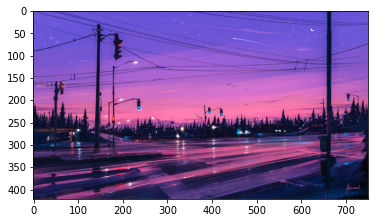

In [20]:
image_array_list = []

for img_path in image_path_list:

    image = Image.open(img_path)
    image = image.convert('RGB')

    if image.size[0] > 750:
        basewidth = 750
        wpercent = (basewidth/float(image.size[0]))
        hsize = int((float(image.size[1])*float(wpercent)))
        image = image.resize((basewidth, hsize), Image.ANTIALIAS)

        print(str(img_path.split('\\')[-1]) + ' ***Resized***')

    np_image_data = np.asarray(image)
    np_image_data = np_image_data.reshape((np_image_data.shape[0] * np_image_data.shape[1], np_image_data.shape[2]))
    
    image_array_list.append(np_image_data)
    plt.imshow(image)

#### Question 2.1
My implementation of K-means/K-medoids centers around the K_Means() class. This class is initialized with cluster number (k=3), max iterations (max_iter=50), threshold (threshold = 0.001), distance measure (distance_method='L2'), K-medoids (k_medoids=False), and dummy centers (dummy_centers=False). Cluster number and max iterations are self explanatory. Threshold is the value that tells the algorithm when to stop; in this case, if the Euclidean distance between the previous iteration divided by the current iteration's Euclidean is less than the threshold (not much change has occured, though it IS data relative; threshold value may need changing by user) then the algorithm will stop. Distance measure lets whoever is running the K-means/K-medoids algorithm decide which of the four distance measures they want to use: Euclidean (norm 2), Manhattan (norm 1), "inf", or "-inf" distance. As seen below in K-medoids k_value vs. Sum of Squared Distance for Distance Measures and K-medoids k_value vs. Time for Distance Measures, some preliminary tests were performed to see which distance measures worked best. Generally, based on the curves seen in the two graphs below, the Euclidean 'L2' distance measure seems to be most optimal. The Euclidean distance has the smoothest curve in K-medoids k_value vs. Sum of Squared Distance for Distance Measures (tied with 'L1' distance) and takes the least time to run. As a distance measure side note: every run gives different "optimal" distance metrics; 'L2' just so happens to consistently be the best. Finally, k_medoids allows the user to choose whether the algorithm will run a K-means (k_medoids=False) or K-medoids (k_medoids=True), allowing for more flexibility. Dummy_centers is for testing purposes. As a last sidenote: the K_Means() class loads data with K_Means.loadData() as a numpy 2D array (image modification might be necessary before loading the data) and presents the final data as K_Means.centers as the cluster centers, K_Means.labels as the labels indexed with the data point, and K_Means.labeled_np_data, which combines the numpy 2D array data points and their labels (as the last column).

For K-means, the algorithm is quite simple: initialize clusters, assign clusters, re-calculate clusters, repeat previous two steps until convergence or threshold is crossed. Cluster initialization is simply choosing k random datapoints for cluster values. For K-means, cluster assignment is simply finding which cluster centroid has the smallest distance (via whatever measure) from the datapoint, for all datapoints. Each datapoint's cluster assignment is stored in self.labels and self.labeled_np_data. Cluster re-calculation takes all data points associated with cluster k and finds the average value for all dimensions. This centroid is then assigned as the center of cluster k. By repeating these assignment/re-calculation steps many times over, local minimums will always be found (see Q1). The K_Means() class takes in an array of size (n) x (d), where n is the number of datapoints and d is the data dimensionality. For image data, the 3D matrix needed to be flattened into a size (# of pixels) x (3), where the dimensions indicate 'rgb.' Cluster centers were stored in a (k) x (d) matrix, and the labels were stored in an array of size n. For simplicity, self.labeled_np_data combined the data and labels into one (n) x (d+1) matrix. All of the calculations for assignment/re-calculation were done using numpy broadcasting (where needed) in order to speed up the algorithm. Euclidean/Manhattan/etc. distances were calculated using np.linalg.norm() for brevity sake.

For K-medoids, nearly everything is the same as K-means EXCEPT for cluster re-calculation. Because K-medoids uses representative datapoints as "centers", the re-calculation doesn't find the mean, but rather finds the closest datapoint to the cluster centroid and assigns that point as the new center. The more correct way to run this algorithm is to see which datapoint minimizes total distance between all other datapoints, though, unfortunately, this method seems to take far too long to be practical (at least with my implementation; the dataset is quite large). By finding the cluster centroid (where distance between all points will be minimized) and then finding the closest datapoint to this centroid, a similar if not the same effect will be achieved. 

In [4]:
import time

global_k_val_data = []
global_ssd_data = []
global_timing_data = []

for dist in ['L1', 'L2', 'inf', '-inf']:

    k_val_data = []
    ssd_data = []
    timing_data = []
    complete_data = []

    for k_val in range(1, 20):
        start = time.time()

        k_means = K_Means(threshold=0.001, max_iter=20, k=k_val, distance_method=dist, k_medoids=True)

        k_means.loadData(image_array_list[0])

        k_means.train()

        delta = time.time() - start

        k_val_data.append(k_means.k)
        ssd_data.append(k_means.ssd)
        timing_data.append(delta)

    global_ssd_data.append(ssd_data)
    global_k_val_data.append(k_val_data)
    global_timing_data.append(timing_data)

C:\Users\SAAllegri\anaconda3\envs\ISYE-6740\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\SAAllegri\anaconda3\envs\ISYE-6740\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


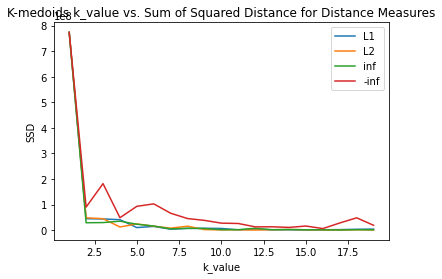

In [5]:
dist_measures = ['L1', 'L2', 'inf', '-inf']
for i in range(len(dist_measures)):
    plt.plot(global_k_val_data[i], global_ssd_data[i], label=dist_measures[i])

plt.legend()
plt.xlabel("k_value")
plt.ylabel("SSD")
plt.title('K-medoids k_value vs. Sum of Squared Distance for Distance Measures')

plt.show()

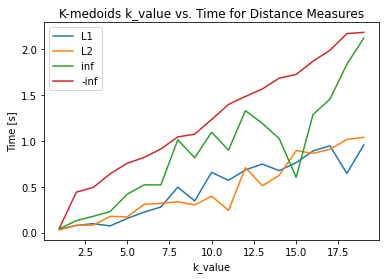

In [6]:
dist_measures = ['L1', 'L2', 'inf', '-inf']
for i in range(len(dist_measures)):
    plt.plot(global_k_val_data[i], global_timing_data[i], label=dist_measures[i])

plt.legend()
plt.xlabel("k_value")
plt.ylabel("Time [s]")
plt.title('K-medoids k_value vs. Time for Distance Measures')

plt.show()

#### Question 2.2

For my implementation of K-means/K-medioids, as k becomes larger, runtime significantly increases. This is also in tandem with a consistent decrease in my evaluation metric: sum of square distances (ssd; lower values indicate better clustering). The question is, where does the k value become redundently high? It has been suggested that the elbow method is the best way to evaluate the best k values. Below, you can see some code with experiments run on different k values for K-medoids with three different images (the two provided and one of my own). The k values range from 1 to 20, and, as a general rule, timing increases and ssd decreases with increasing k values (there are some jumps with K-medoids, but the trend is consistent). The elbow method, in basically all three images, suggests k=2-4 total clusters. All data can be seen below in the two graphs K-medoids k_value vs. Sum of Squared Distances for Varying k and K-medoids k_value vs. Time for Varying k.

In [7]:
global_k_val_data = []
global_ssd_data = []
global_timing_data = []

for image_array in image_array_list:
    
    k_val_data = []
    ssd_data = []
    timing_data = []
    complete_data = []

    for k_val in range(1, 20):
        start = time.time()

        k_means = K_Means(threshold=0.001, max_iter=20, distance_method='L1', k=k_val, k_medoids=True)

        k_means.loadData(image_array)

        k_means.train()

        delta = time.time() - start

        k_val_data.append(k_means.k)
        ssd_data.append(k_means.ssd)
        timing_data.append(delta)
        
    global_ssd_data.append(ssd_data)
    global_k_val_data.append(k_val_data)
    global_timing_data.append(timing_data)

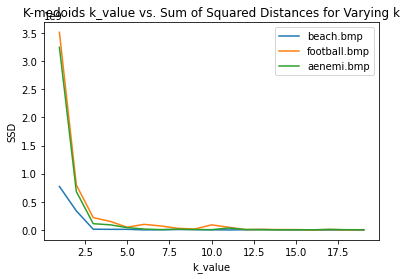

In [8]:
titles = ['beach.bmp', 'football.bmp', 'aenemi.bmp']
for i in range(len(titles)):
    plt.plot(global_k_val_data[i], global_ssd_data[i], label=titles[i])

plt.legend()
plt.xlabel("k_value")
plt.ylabel("SSD")
plt.title('K-medoids k_value vs. Sum of Squared Distances for Varying k')

plt.show()

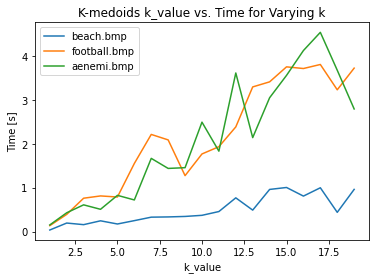

In [9]:
titles = ['beach.bmp', 'football.bmp', 'aenemi.bmp']
for i in range(len(titles)):
    plt.plot(global_k_val_data[i], global_timing_data[i], label=titles[i])

plt.legend()
plt.xlabel("k_value")
plt.ylabel("Time [s]")
plt.title('K-medoids k_value vs. Time for Varying k')

plt.show()

#### Question 2.3

When running K-medoids with dummy centers, generally the outcomes were similar; however, the timing results ended up being some relatively consistent percent faster when the centers were randomly chosen. Seen below is the code testing timing for dummy centers vs randomized centers over the course of 20 trials for three separate images (all collected data was then averaged). Ssd values were relatively similar for both. 

In [10]:
multiple_trials_percent_faster = []

for i in range(1, 20):
    smart_timing = []
    dummy_timing = []
    
    for image_array in image_array_list:
        for dummy_data in [False, True]:
            start = time.time()

            k_means = K_Means(threshold=0.001, max_iter=20, k=10, k_medoids=True, dummy_centers=dummy_data)

            k_means.loadData(image_array)

            k_means.train()

            delta = time.time() - start

            if dummy_data:
                dummy_timing.append(k_means.time)
            else:
                smart_timing.append(k_means.time)
    
    randomized_percent_faster = (np.sum(smart_timing) - np.sum(dummy_timing)) / np.sum(dummy_timing) * 100
    multiple_trials_percent_faster.append(randomized_percent_faster)

In [11]:
print('Randomized K-medoids centers are ' + str(np.round(np.average(multiple_trials_percent_faster), 2) * -1) + '% faster')

Randomized K-medoids centers are 27.02% faster


#### Question 2.4

Generally, after running K-means using the same tests as K-medoids (testing different k values, using different distance measures, and using dummy centers), the outcomes are generally similar EXCEPT for a percieved "smoother" set of results for K-means. In more scientific terms, K-means seems to converge faster and the elbow method (for testing which k value is best) is much easier to use. Generally, K-means also ran faster. This increase in speed is most likely due to reaching the algorithm break threshold faster. Finally, K-means timing and ssd values are more consistent and linear, less jumpy. This is most likely due to K-means reaching the threshold faster and not reaching the max_iter cap as often (though this is just a thought). All graphs/data can be seen below.

In [12]:
global_k_val_data = []
global_ssd_data = []
global_timing_data = []

for dist in ['L1', 'L2', 'inf', '-inf']:

    k_val_data = []
    ssd_data = []
    timing_data = []
    complete_data = []

    for k_val in range(1, 20):
        start = time.time()

        k_means = K_Means(threshold=0.001, max_iter=20, k=k_val, distance_method=dist)

        k_means.loadData(image_array_list[0])

        k_means.train()

        delta = time.time() - start

        k_val_data.append(k_means.k)
        ssd_data.append(k_means.ssd)
        timing_data.append(delta)

    global_ssd_data.append(ssd_data)
    global_k_val_data.append(k_val_data)
    global_timing_data.append(timing_data)

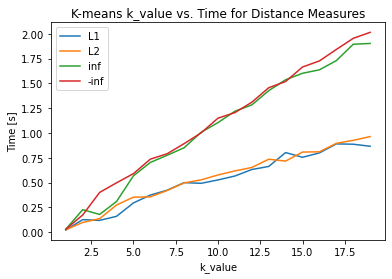

In [13]:
dist_measures = ['L1', 'L2', 'inf', '-inf']
for i in range(len(dist_measures)):
    plt.plot(global_k_val_data[i], global_timing_data[i], label=dist_measures[i])

plt.legend()
plt.xlabel("k_value")
plt.ylabel("Time [s]")
plt.title('K-means k_value vs. Time for Distance Measures')

plt.show()

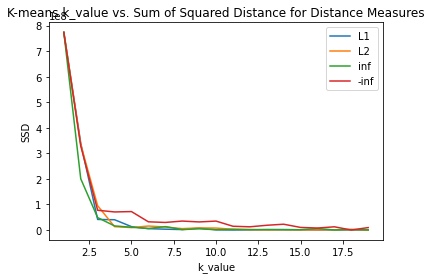

In [14]:
dist_measures = ['L1', 'L2', 'inf', '-inf']
for i in range(len(dist_measures)):
    plt.plot(global_k_val_data[i], global_ssd_data[i], label=dist_measures[i])

plt.legend()
plt.xlabel("k_value")
plt.ylabel("SSD")
plt.title('K-means k_value vs. Sum of Squared Distance for Distance Measures')

plt.show()

In [15]:
global_k_val_data = []
global_ssd_data = []
global_timing_data = []

for image_array in image_array_list:
    
    k_val_data = []
    ssd_data = []
    timing_data = []
    complete_data = []

    for k_val in range(1, 20):
        start = time.time()

        k_means = K_Means(threshold=0.001, max_iter=20, k=k_val)

        k_means.loadData(image_array)

        k_means.train()

        delta = time.time() - start

        k_val_data.append(k_means.k)
        ssd_data.append(k_means.ssd)
        timing_data.append(delta)
        
    global_ssd_data.append(ssd_data)
    global_k_val_data.append(k_val_data)
    global_timing_data.append(timing_data)

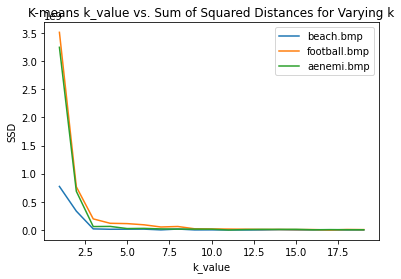

In [16]:
titles = ['beach.bmp', 'football.bmp', 'aenemi.bmp']
for i in range(len(titles)):
    plt.plot(global_k_val_data[i], global_ssd_data[i], label=titles[i])

plt.legend()
plt.xlabel("k_value")
plt.ylabel("SSD")
plt.title('K-means k_value vs. Sum of Squared Distances for Varying k')

plt.show()

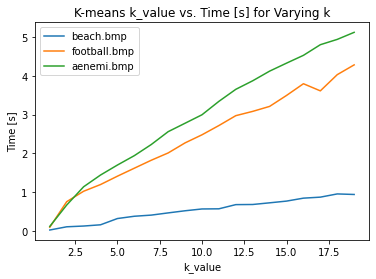

In [17]:
titles = ['beach.bmp', 'football.bmp', 'aenemi.bmp']
for i in range(len(titles)):
    plt.plot(global_k_val_data[i], global_timing_data[i], label=titles[i])

plt.legend()
plt.xlabel("k_value")
plt.ylabel("Time [s]")
plt.title('K-means k_value vs. Time [s] for Varying k')

plt.show()

In [18]:
multiple_trials_percent_faster = []

for i in range(1, 20):
    smart_timing = []
    dummy_timing = []
    
    for image_array in image_array_list:
        for dummy_data in [False, True]:
            start = time.time()

            k_means = K_Means(threshold=0.001, max_iter=20, k=3, dummy_centers=dummy_data)

            k_means.loadData(image_array)

            k_means.train()

            delta = time.time() - start

            if dummy_data:
                dummy_timing.append(delta)
            else:
                smart_timing.append(delta)
    
    randomized_percent_faster = (np.sum(smart_timing) - np.sum(dummy_timing)) / np.sum(dummy_timing) * 100
    multiple_trials_percent_faster.append(randomized_percent_faster)

In [19]:
print('Randomized K-means centers are ' + str(np.round(np.average(multiple_trials_percent_faster), 2) * -1) + '% faster')

Randomized K-means centers are 13.7% faster
